In [3]:
import requests
import json

In [1]:
url_rankings_explain = "http://localhost:8080/rank/xgboost?explain=TRUE"
url_rankings = "http://localhost:8080/rank/xgboost"
url_feedback = "http://localhost:8080/feedback"

###  Model screenshot: 

This was the model with the incorrect value for crop (we had put number instead of string as type and crop didn't get picked up) 

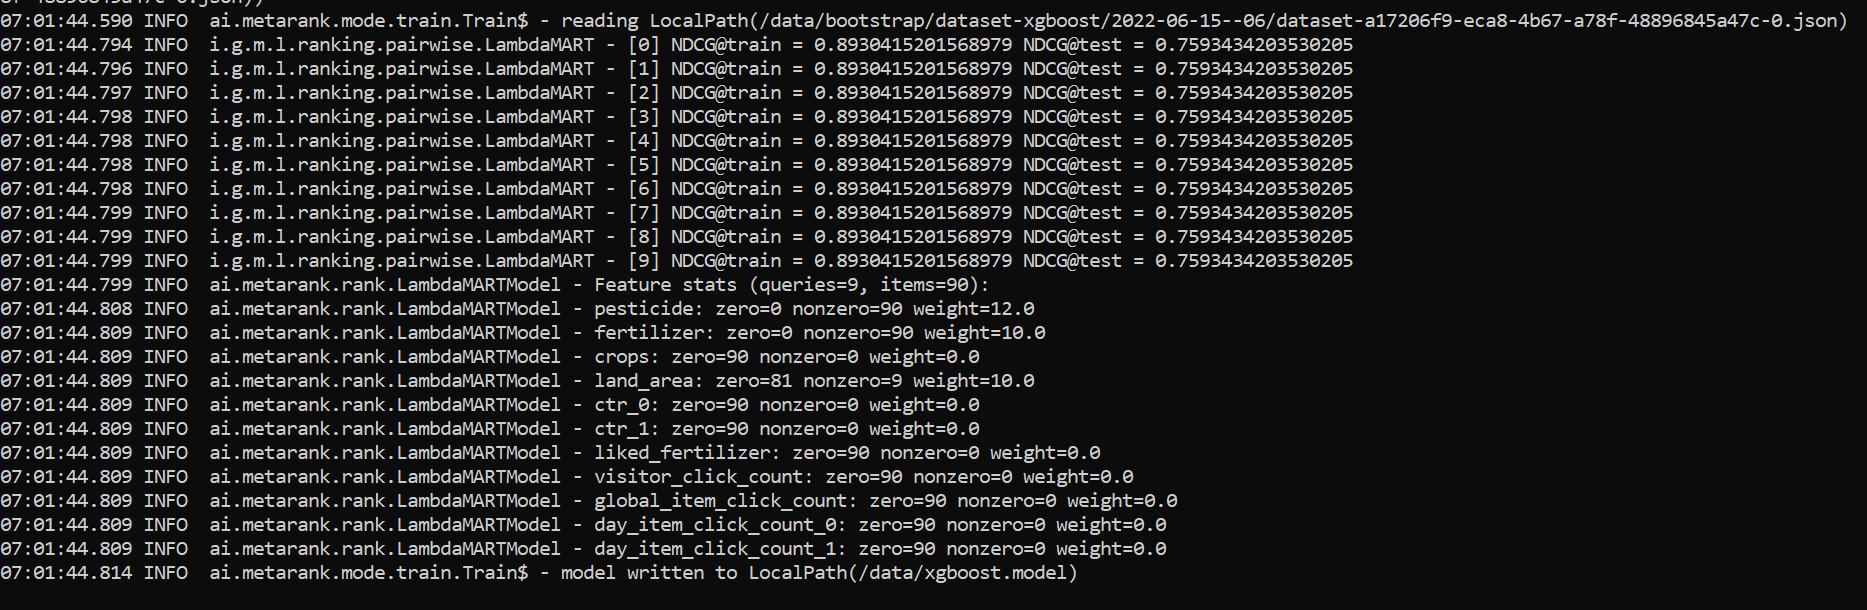

In [ ]:
Coorected model :

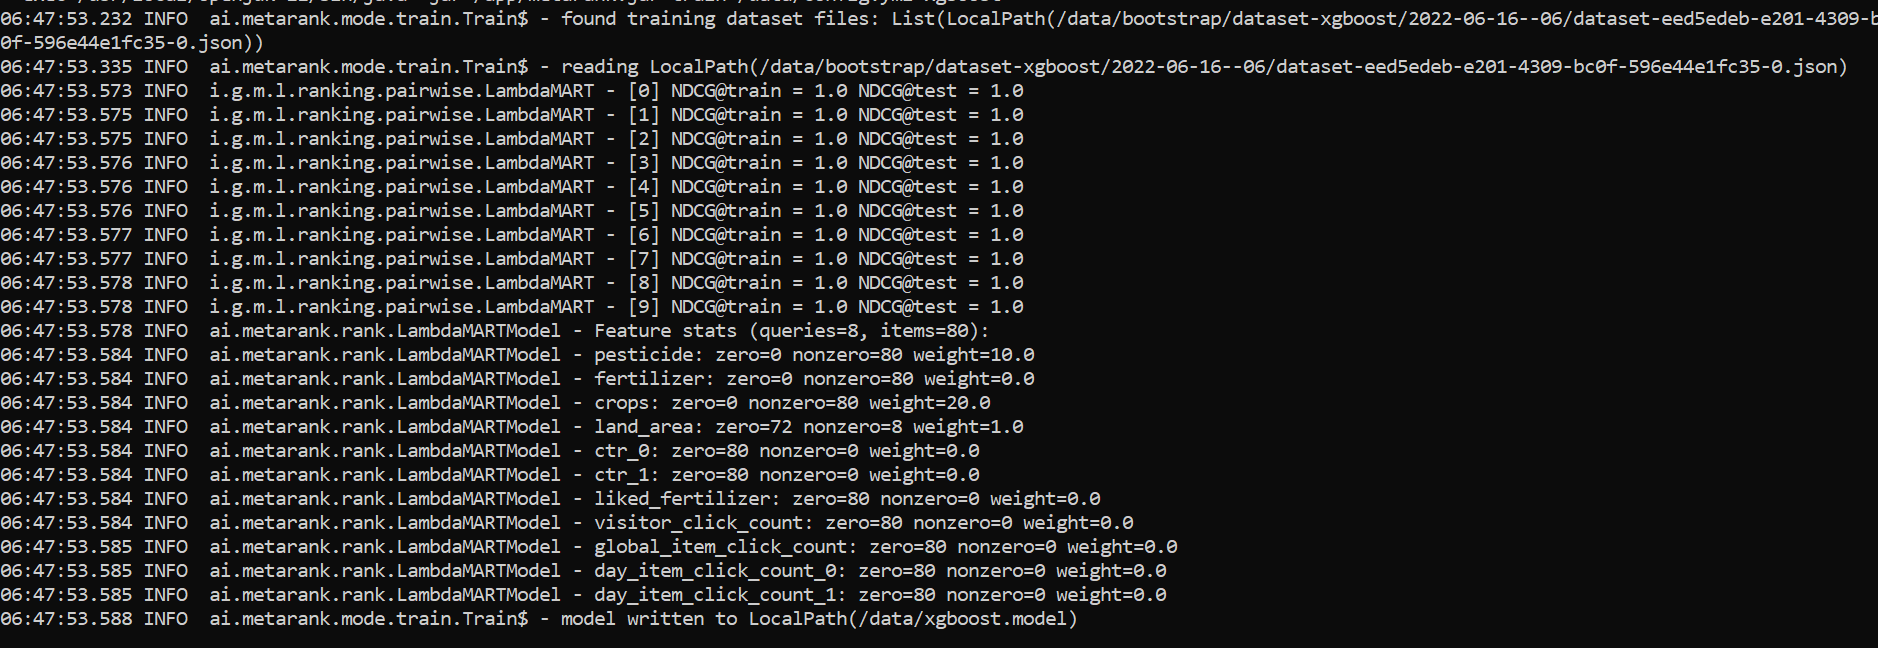

As we can see, crop is picked up now with weight of 20

### Redis cli keys :  

```
1) "item/default/fertilizer/2"
2) "session/default/visitor_click_count/2"
```

### Sending payload having all 10 items for a  kharif user id ('1') for ranked response

- The timestamp is 1638316800003 which is 3 more than the last timestamp in the trained data 
- Ranking id is '11' which does not exist in the data 
- User id is 1 who is a kharif user. 

I expect the items 1-5 will have a higher score than than the other items as I've made all the kharif users interact only with items 1-5 

I expect user feature 'crop' to be important and feature 'land_area' to not be important 

In [4]:
payload = json.dumps({
  "event": "ranking",
  "fields": [],
  "id": "11",
  "items": [
    {
      "id": "1",
      "relevancy": 0
    },
    {
      "id": "2",
      "relevancy": 0
    },
    {
      "id": "3",
      "relevancy": 0
    },
    {
      "id": "4",
      "relevancy": 0
    },
    {
      "id": "5",
      "relevancy": 0
    },
    {
      "id": "6",
      "relevancy": 0
    },
    {
      "id": "7",
      "relevancy": 0
    },
    {
      "id": "8",
      "relevancy": 0
    },
    {
      "id": "9",
      "relevancy": 0
    },
      
    {
      "id": "10",
      "relevancy": 0
    }
  ],
  "session": "1",
  "tenant": "default",
  "timestamp": 1638316800003,
  "user": "9"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url_rankings, headers=headers, data=payload,timeout=10)
json1_data = json.loads(response.text)
json1_data['items']

[{'item': '1', 'score': -0.21438023447990417, 'features': []},
 {'item': '2', 'score': -0.21438023447990417, 'features': []},
 {'item': '3', 'score': -0.21438023447990417, 'features': []},
 {'item': '4', 'score': -0.21438023447990417, 'features': []},
 {'item': '5', 'score': -0.21438023447990417, 'features': []},
 {'item': '6', 'score': -0.21438023447990417, 'features': []},
 {'item': '7', 'score': -0.21438023447990417, 'features': []},
 {'item': '8', 'score': -0.21438023447990417, 'features': []},
 {'item': '9', 'score': -0.21438023447990417, 'features': []},
 {'item': '10', 'score': -0.21438023447990417, 'features': []}]

In [ ]:
All of them have the same score  Looking at the explain?rank for 2 and 9 ;  

In [5]:
response = requests.request("POST", url_rankings_explain, headers=headers, data=payload,timeout=10)
json1_data = json.loads(response.text)
print(json1_data['items'][2])
print('\n')
print(json1_data['items'][9])

{'item': '3', 'score': -0.21438023447990417, 'features': [{'name': 'pesticide', 'index': 0}, {'name': 'fertilizer', 'index': 0}, {'name': 'crops', 'index': 0}, {'name': 'land_area', 'value': 0.0}, {'names': ['ctr_7', 'ctr_30'], 'values': [0.0, 0.0]}, {'name': 'liked_fertilizer', 'value': 0.0}, {'name': 'visitor_click_count', 'value': 0.0}, {'name': 'global_item_click_count', 'value': 0.0}, {'names': ['day_item_click_count_7', 'day_item_click_count_30'], 'values': [0.0, 0.0]}]}


{'item': '10', 'score': -0.21438023447990417, 'features': [{'name': 'pesticide', 'index': 0}, {'name': 'fertilizer', 'index': 0}, {'name': 'crops', 'index': 0}, {'name': 'land_area', 'value': 0.0}, {'names': ['ctr_7', 'ctr_30'], 'values': [0.0, 0.0]}, {'name': 'liked_fertilizer', 'value': 0.0}, {'name': 'visitor_click_count', 'value': 0.0}, {'name': 'global_item_click_count', 'value': 0.0}, {'names': ['day_item_click_count_7', 'day_item_click_count_30'], 'values': [0.0, 0.0]}]}


**This observation was for the previous use-case, however,I'm keeping it here as its useful to look at item metadata**

We see that item 2 is ranked low because it has fertilizer index is 3: 
However, looking at the item metadata, there is nothing unique about the fertilizer value of item 2: 

```
{"event": "item", "id": "1", "timestamp": 1638316800000, "item": "1", "fields": [{"name": "pesticide", "value": "pesticide_1"}, {"name": "fertilizer", "value": "fertilizer_3"}]}
{"event": "item", "id": "2", "timestamp": 1638316800000, "item": "2", "fields": [{"name": "pesticide", "value": "pesticide_1"}, {"name": "fertilizer", "value": "fertilizer_3"}]}
{"event": "item", "id": "3", "timestamp": 1638316800000, "item": "3", "fields": [{"name": "pesticide", "value": "pesticide_1"}, {"name": "fertilizer", "value": "fertilizer_3"}]}
{"event": "item", "id": "4", "timestamp": 1638316800000, "item": "4", "fields": [{"name": "pesticide", "value": "pesticide_1"}, {"name": "fertilizer", "value": "fertilizer_2"}]}
{"event": "item", "id": "5", "timestamp": 1638316800000, "item": "5", "fields": [{"name": "pesticide", "value": "pesticide_1"}, {"name": "fertilizer", "value": "fertilizer_2"}]}
{"event": "item", "id": "6", "timestamp": 1638316800000, "item": "6", "fields": [{"name": "pesticide", "value": "pesticide_3"}, {"name": "fertilizer", "value": "fertilizer_1"}]}
{"event": "item", "id": "7", "timestamp": 1638316800000, "item": "7", "fields": [{"name": "pesticide", "value": "pesticide_3"}, {"name": "fertilizer", "value": "fertilizer_1"}]}
{"event": "item", "id": "8", "timestamp": 1638316800000, "item": "8", "fields": [{"name": "pesticide", "value": "pesticide_2"}, {"name": "fertilizer", "value": "fertilizer_1"}]}
{"event": "item", "id": "9", "timestamp": 1638316800000, "item": "9", "fields": [{"name": "pesticide", "value": "pesticide_2"}, {"name": "fertilizer", "value": "fertilizer_1"}]}
{"event": "item", "id": "10", "timestamp": 1638316800000, "item": "10", "fields": [{"name": "pesticide", "value": "pesticide_2"}, {"name": "fertilizer", "value": "fertilizer_1"}]}

```

### Creating a user with features of rabi/kharif and land area and checking results:  

Creating a user with the user-id 11,12 who are 'kharif' and 'rabi' each with different land areas '2.14' and '1.12'

In [6]:
payload = json.dumps({
    "event": "user",
    "id": "11",
    "timestamp": 1638316800003,
    "user": "11",
    "fields":[{"name": "land_area", "value": 2.14},
              {"name": "crops", "value": "kharif"}],
})
headers = {
  'Content-Type': 'application/json'
}


response = requests.request("POST", url_feedback, headers=headers, data=payload)
print(response.text)

payload = json.dumps({
    "event": "user",
    "id": "12",
    "timestamp": 1638316800003,
    "user": "12",
    "fields":[{"name": "land_area", "value": 1.12},
              {"name": "crops", "value": "rabi"}],
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url_feedback, headers=headers, data=payload)
print(response.text)

### Sending a ranking request with user 11 :

In [7]:
payload = json.dumps({
  "event": "ranking",
  "fields": [],
  "id": "12",
  "items": [
    {
      "id": "1",
      "relevancy": 0
    },
    {
      "id": "2",
      "relevancy": 0
    },
    {
      "id": "3",
      "relevancy": 0
    },
    {
      "id": "4",
      "relevancy": 0
    },
    {
      "id": "5",
      "relevancy": 0
    },
    {
      "id": "6",
      "relevancy": 0
    },
    {
      "id": "7",
      "relevancy": 0
    },
    {
      "id": "8",
      "relevancy": 0
    },
    {
      "id": "9",
      "relevancy": 0
    },
      
    {
      "id": "10",
      "relevancy": 0
    }
  ],
  "session": "1",
  "tenant": "default",
  "timestamp": 1638316800009,
  "user": "11"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url_rankings, headers=headers, data=payload,timeout=10)
json1_data = json.loads(response.text)
json1_data['items']

[{'item': '1', 'score': 1.231103777885437, 'features': []},
 {'item': '2', 'score': 1.231103777885437, 'features': []},
 {'item': '3', 'score': 1.231103777885437, 'features': []},
 {'item': '4', 'score': 1.231103777885437, 'features': []},
 {'item': '5', 'score': 1.231103777885437, 'features': []},
 {'item': '6', 'score': 1.231103777885437, 'features': []},
 {'item': '7', 'score': 1.231103777885437, 'features': []},
 {'item': '8', 'score': 1.231103777885437, 'features': []},
 {'item': '9', 'score': 1.231103777885437, 'features': []},
 {'item': '10', 'score': 1.231103777885437, 'features': []}]

### Sending a ranking request with user 12 :

In [8]:
payload = json.dumps({
  "event": "ranking",
  "fields": [],
  "id": "13",
  "items": [
    {
      "id": "1",
      "relevancy": 0
    },
    {
      "id": "2",
      "relevancy": 0
    },
    {
      "id": "3",
      "relevancy": 0
    },
    {
      "id": "4",
      "relevancy": 0
    },
    {
      "id": "5",
      "relevancy": 0
    },
    {
      "id": "6",
      "relevancy": 0
    },
    {
      "id": "7",
      "relevancy": 0
    },
    {
      "id": "8",
      "relevancy": 0
    },
    {
      "id": "9",
      "relevancy": 0
    },
      
    {
      "id": "10",
      "relevancy": 0
    }
  ],
  "session": "1",
  "tenant": "default",
  "timestamp": 1638316800009,
  "user": "12"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url_rankings, headers=headers, data=payload,timeout=10)
json1_data = json.loads(response.text)
json1_data['items']

[{'item': '1', 'score': -0.21438023447990417, 'features': []},
 {'item': '2', 'score': -0.21438023447990417, 'features': []},
 {'item': '3', 'score': -0.21438023447990417, 'features': []},
 {'item': '4', 'score': -0.21438023447990417, 'features': []},
 {'item': '5', 'score': -0.21438023447990417, 'features': []},
 {'item': '6', 'score': -0.21438023447990417, 'features': []},
 {'item': '7', 'score': -0.21438023447990417, 'features': []},
 {'item': '8', 'score': -0.21438023447990417, 'features': []},
 {'item': '9', 'score': -0.21438023447990417, 'features': []},
 {'item': '10', 'score': -0.21438023447990417, 'features': []}]

This is unexpected. The scores for the two created users are different from each but they are the same across all the items

### Trying to add new items with the different metadata and seeing how user preferences vary across them : 

In [9]:
payload = json.dumps({
    "event": "item",
    "id": "11",
    "timestamp": 1638316800003,
    "item": "11",
    "fields":[{"name": "pesticide", "value": "pesticide_1"},
              {"name": "fertilizer", "value": "fertilizer_3"}],
})
headers = {
  'Content-Type': 'application/json'
}


response = requests.request("POST", url_feedback, headers=headers, data=payload)
print(response.text)

payload = json.dumps({
    "event": "item",
    "id": "12",
    "timestamp": 1638316800003,
    "item": "12",
    "fields":[{"name": "pesticide", "value": "pesticide_3"},
              {"name": "fertilizer", "value": "fertilizer_1"}],
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url_feedback, headers=headers, data=payload)
print(response.text)

payload = json.dumps({
    "event": "item",
    "id": "13",
    "timestamp": 1638316800003,
    "item": "13",
    "fields":[{"name": "pesticide", "value": "pesticide_2"},
              {"name": "fertilizer", "value": "fertilizer_1"}],
})
headers = {
  'Content-Type': 'application/json'
}



response = requests.request("POST", url_feedback, headers=headers, data=payload)
print(response.text)

## Checking ranking for above items for newly created  user 11: 

In [10]:
payload = json.dumps({
  "event": "ranking",
  "fields": [],
  "id": "14",
  "items": [
    {
      "id": "11",
      "relevancy": 0
    },
    {
      "id": "12",
      "relevancy": 0
    },
    {
      "id": "13",
      "relevancy": 0
    }
  ],
  "session": "1",
  "tenant": "default",
  "timestamp": 16383168000010,
  "user": "11"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url_rankings, headers=headers, data=payload,timeout=10)
json1_data = json.loads(response.text)
json1_data['items']

[{'item': '11', 'score': 1.224100947380066, 'features': []},
 {'item': '12', 'score': -0.2320195734500885, 'features': []},
 {'item': '13', 'score': -0.2320195734500885, 'features': []}]

## Checking ranking for above items for newly created  user 12: 

In [11]:
payload = json.dumps({
  "event": "ranking",
  "fields": [],
  "id": "15",
  "items": [
    {
      "id": "11",
      "relevancy": 0
    },
    {
      "id": "12",
      "relevancy": 0
    },
    {
      "id": "13",
      "relevancy": 0
    }
  ],
  "session": "1",
  "tenant": "default",
  "timestamp": 16383168000011,
  "user": "12"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url_rankings, headers=headers, data=payload,timeout=10)
json1_data = json.loads(response.text)
json1_data['items']

[{'item': '13', 'score': 1.2132227420806885, 'features': []},
 {'item': '12', 'score': 1.2088656425476074, 'features': []},
 {'item': '11', 'score': -0.21438023447990417, 'features': []}]

In [13]:
response = requests.request("POST", url_rankings_explain, headers=headers, data=payload,timeout=10)
json1_data = json.loads(response.text)
json1_data['items']

[{'item': '13',
  'score': 1.2132227420806885,
  'features': [{'name': 'pesticide', 'index': 2},
   {'name': 'fertilizer', 'index': 1},
   {'name': 'crops', 'index': 1},
   {'name': 'land_area', 'value': 0.0},
   {'names': ['ctr_7', 'ctr_30'], 'values': [0.0, 0.0]},
   {'name': 'liked_fertilizer', 'value': 0.0},
   {'name': 'visitor_click_count', 'value': 0.0},
   {'name': 'global_item_click_count', 'value': 0.0},
   {'names': ['day_item_click_count_7', 'day_item_click_count_30'],
    'values': [0.0, 0.0]}]},
 {'item': '12',
  'score': 1.2088656425476074,
  'features': [{'name': 'pesticide', 'index': 3},
   {'name': 'fertilizer', 'index': 1},
   {'name': 'crops', 'index': 1},
   {'name': 'land_area', 'value': 1.12},
   {'names': ['ctr_7', 'ctr_30'], 'values': [0.0, 0.0]},
   {'name': 'liked_fertilizer', 'value': 0.0},
   {'name': 'visitor_click_count', 'value': 0.0},
   {'name': 'global_item_click_count', 'value': 0.0},
   {'names': ['day_item_click_count_7', 'day_item_click_count_30']

We can see that the preferences for the items has changed: The kharif user prefers 11 and rabi user prefers 12,13

### Metarank not as expected but only when item metadata is added again to feedback: 

- Users with different features (crop and lan_area) are having different
- We need to add the new users metadata and the new items metadata for the ranking to happen accordingly.
- The items/usrs already in the event_data trained on don't seem to have their metdata checked while ranking and probably need to be fed in again
